# Plot HBA SST's

In [1]:
from sst_bst import SSTs
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#input_label = [ f'LBA_{cnt//2}Y' if cnt%2 else f'LBA_{cnt//2}X' for cnt in range(18)]
input_label = ['L72_X', 'L72_Y', 'L77_X', 'L77_Y', 'L83_X', 'L83_Y', 'L88_X', 'L88_Y', 'L90_X', 'L90_Y', 'L92_X', 'L92_Y', 'L93_X', 'L93_Y', 'L94_X', 'L94_Y', 'L95_X', 'L95_Y']
print(input_label)

['L72_X', 'L72_Y', 'L77_X', 'L77_Y', 'L83_X', 'L83_Y', 'L88_X', 'L88_Y', 'L90_X', 'L90_Y', 'L92_X', 'L92_Y', 'L93_X', 'L93_Y', 'L94_X', 'L94_Y', 'L95_X', 'L95_Y']


In [3]:
sis=range(8*3,8*3+12); #signal inputs
#START_TIME="2022-12-03 00:00:00"
#END_TIME=  "2022-12-05 00:00:00"
#START_TIME="2022-12-07 13:35:00" 
#END_TIME="2022-12-07 17:35:00" 
START_TIME="2022-12-08 03:00:00" 
END_TIME="2022-12-08 06:00:00" 
#END_TIME=  "2022-12-08 07:35:00"
tstep_min=1;
#bands=range(512) #all bands

In [31]:
filename="HBA_%s_%imin_RFI.npy"%(START_TIME,tstep_min)
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
def P2dB(P): return 10*np.log10(P)
if True:
    sst=SSTs('sst2') #sst directoty
    tstart=datetime.fromisoformat(START_TIME) 
    tend  =datetime.fromisoformat(END_TIME)
    D=sst.getData(tstart,tend,sis) 
    print(D.shape)
    Pwr=np.sum(D[:,:,:450].mean(axis=1),axis=1)
    Pwr=P2dB(Pwr)-GainADC
    mask=Pwr>-43
    mask2=Pwr<-43
    print(np.max(Pwr),np.sum(mask),np.sum(mask2))
    D0=D.compress(mask2,axis=0)
    D=D.compress(mask,axis=0)
    print(D.shape)
    print(D0.shape)
#    np.save(filename,D)
#else:
#    D=np.load(filename)
#    print(D.shape)
D2=np.percentile(D,50,axis=0)
D1=np.percentile(D0,50,axis=0)

Load SST sst2/SST_2022-12-08-02-35-33.h5
Load SST sst2/SST_2022-12-08-03-35-33.h5
Load SST sst2/SST_2022-12-08-04-35-33.h5
Load SST sst2/SST_2022-12-08-05-35-33.h5
(10801, 12, 512)
-26.545364 2519 8282
(2519, 12, 512)
(8282, 12, 512)


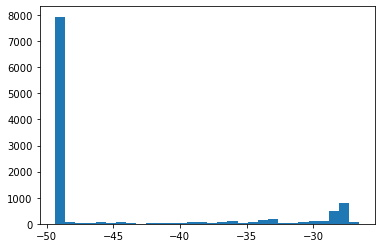

In [32]:
plt.hist(Pwr,bins=30);

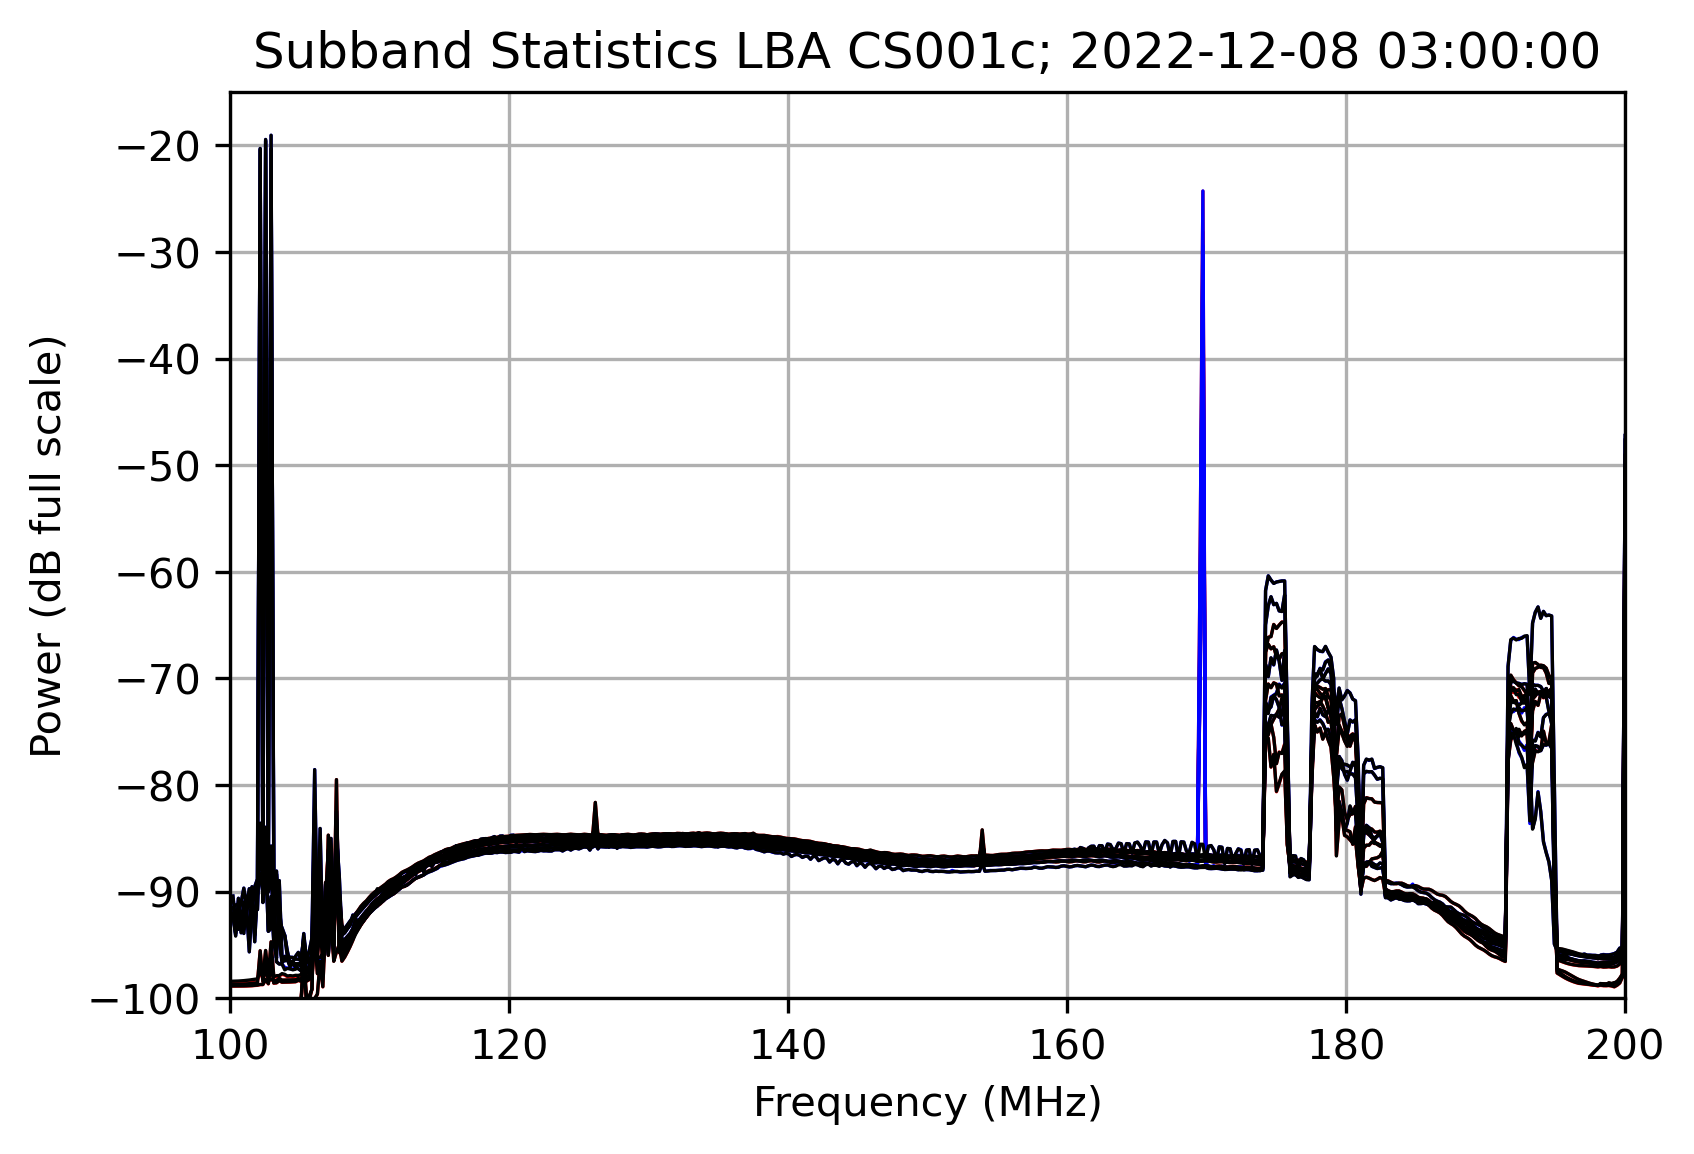

In [36]:
plt.figure(dpi=300)
FS=200
FFT_POINTS=512
STATION_NAME = 'CS001c'
f_as = [200-(FS*cnt)/(2*FFT_POINTS) for cnt in range(FFT_POINTS)]
for cnt, f_si in enumerate(D2[:,:]):
    plot_data = 10 * np.log10(f_si + 1) - 128 - 6 * 4
    plt_label = input_label[cnt]
    scale=-2 if cnt<3 else 0
    plt.plot(f_as, plot_data+scale, 'r-' if cnt<6 else 'b-',linewidth=0.8)
for cnt, f_si in enumerate(D1[:,:]):
    plot_data = 10 * np.log10(f_si + 1) - 128 - 6 * 4
    plt_label = input_label[cnt]
    scale=-2 if cnt<3 else 0
    plt.plot(f_as, plot_data+scale, 'k-',linewidth=0.8)

    
plt.grid()
plt.xlim([100,200])
#plt.xlim([160,165])
#plt.ylim(-89+1,-84+1)
plt.ylim(-100,-15)
#plt.legend(fontsize='small',ncol=5)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dB full scale)")
plt.title(f"Subband Statistics LBA {STATION_NAME}; {START_TIME}")
plt.show()

    

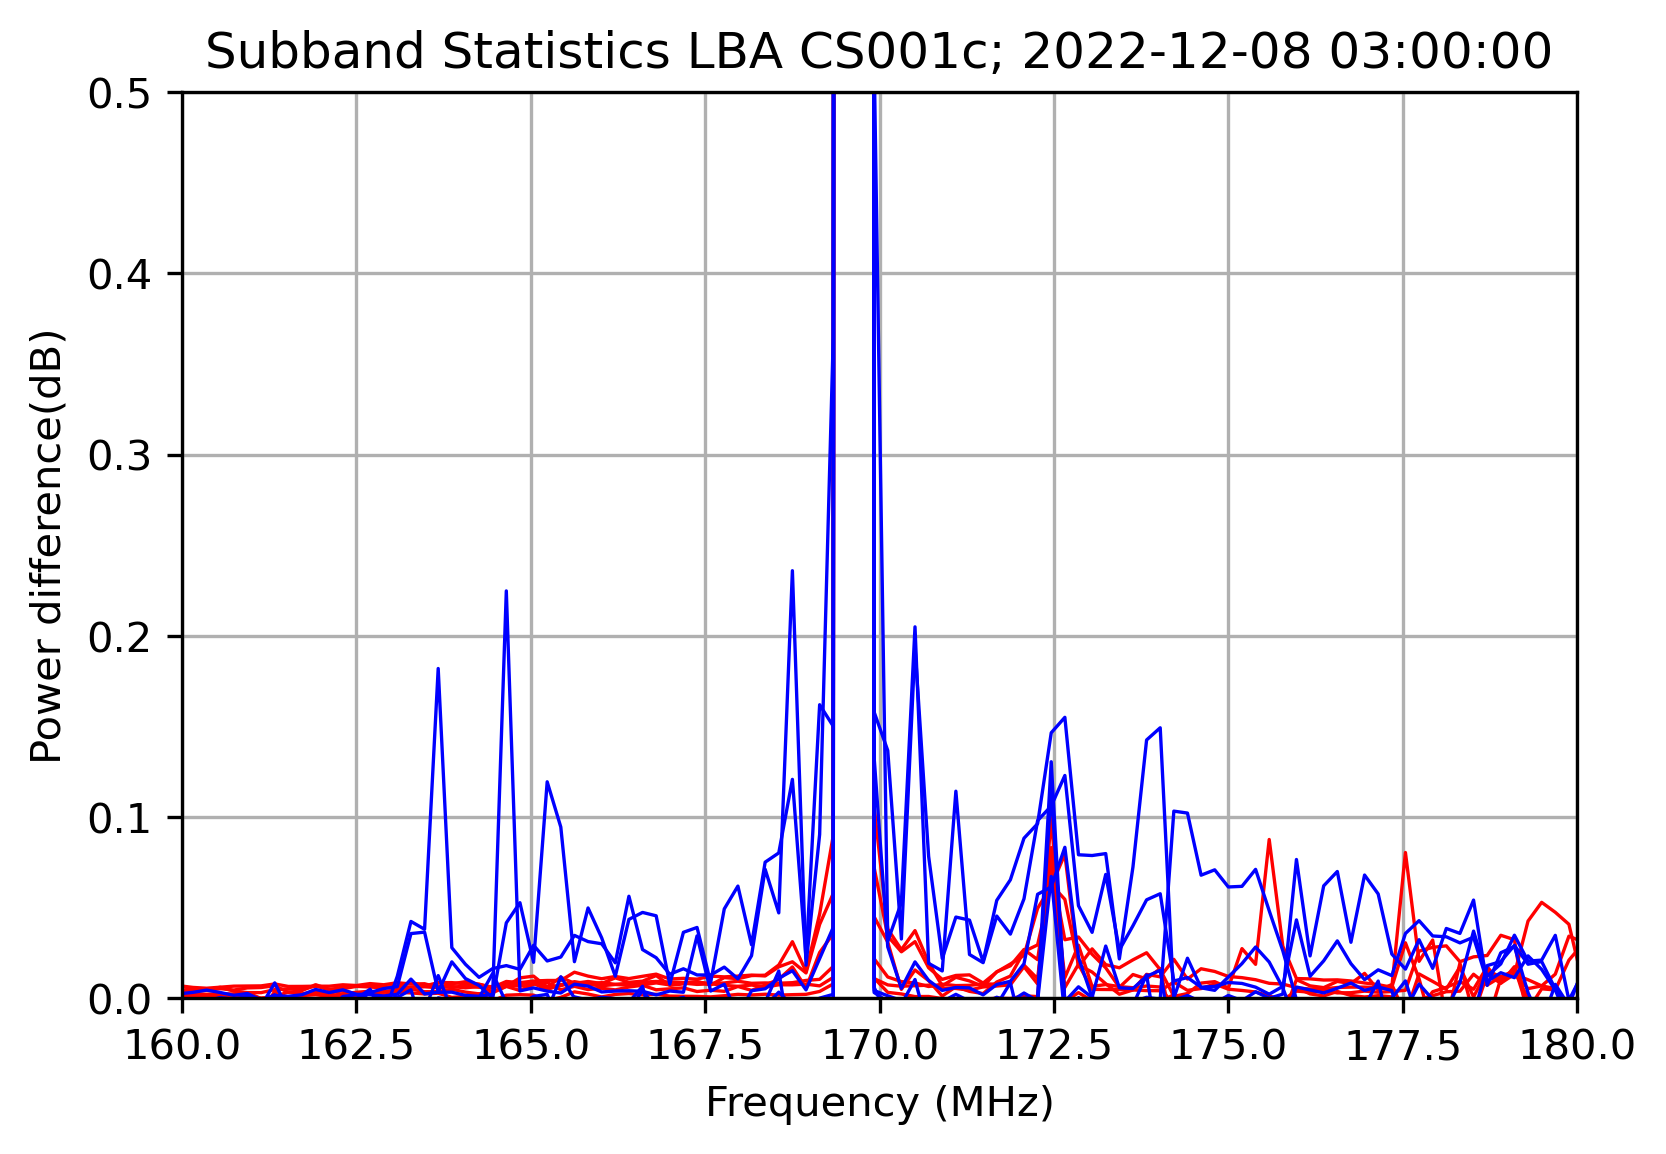

In [7]:
plt.figure(dpi=300)
FS=200
FFT_POINTS=512
STATION_NAME = 'CS001c'
f_as = [200-(FS*cnt)/(2*FFT_POINTS) for cnt in range(FFT_POINTS)]
for cnt, f_si in enumerate(D2[:,:]):
    plot_data = 10 * np.log10(D2[cnt,:]/D1[cnt,:])
    plt_label = input_label[cnt]
#    scale=-2 if cnt<3 else 0
    plt.plot(f_as, plot_data+scale, 'r-' if cnt<6 else 'b-',linewidth=0.8)
#for cnt, f_si in enumerate(D1[:,:]):
#    plot_data = 10 * np.log10(f_si + 1) - 128 - 6 * 4
#    plt_label = input_label[cnt]
#    scale=-2 if cnt<3 else 0
#    plt.plot(f_as, plot_data+scale, 'k-',linewidth=0.8)

    
plt.grid()
#plt.xlim([108,110])
plt.xlim([160,180])
#plt.ylim(-89+1,-84+1)
#plt.ylim(-0.02,0.08)
plt.ylim(-0.0,0.5)
#plt.legend(fontsize='small',ncol=5)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power difference(dB)")
plt.title(f"Subband Statistics LBA {STATION_NAME}; {START_TIME}")
plt.show()

    

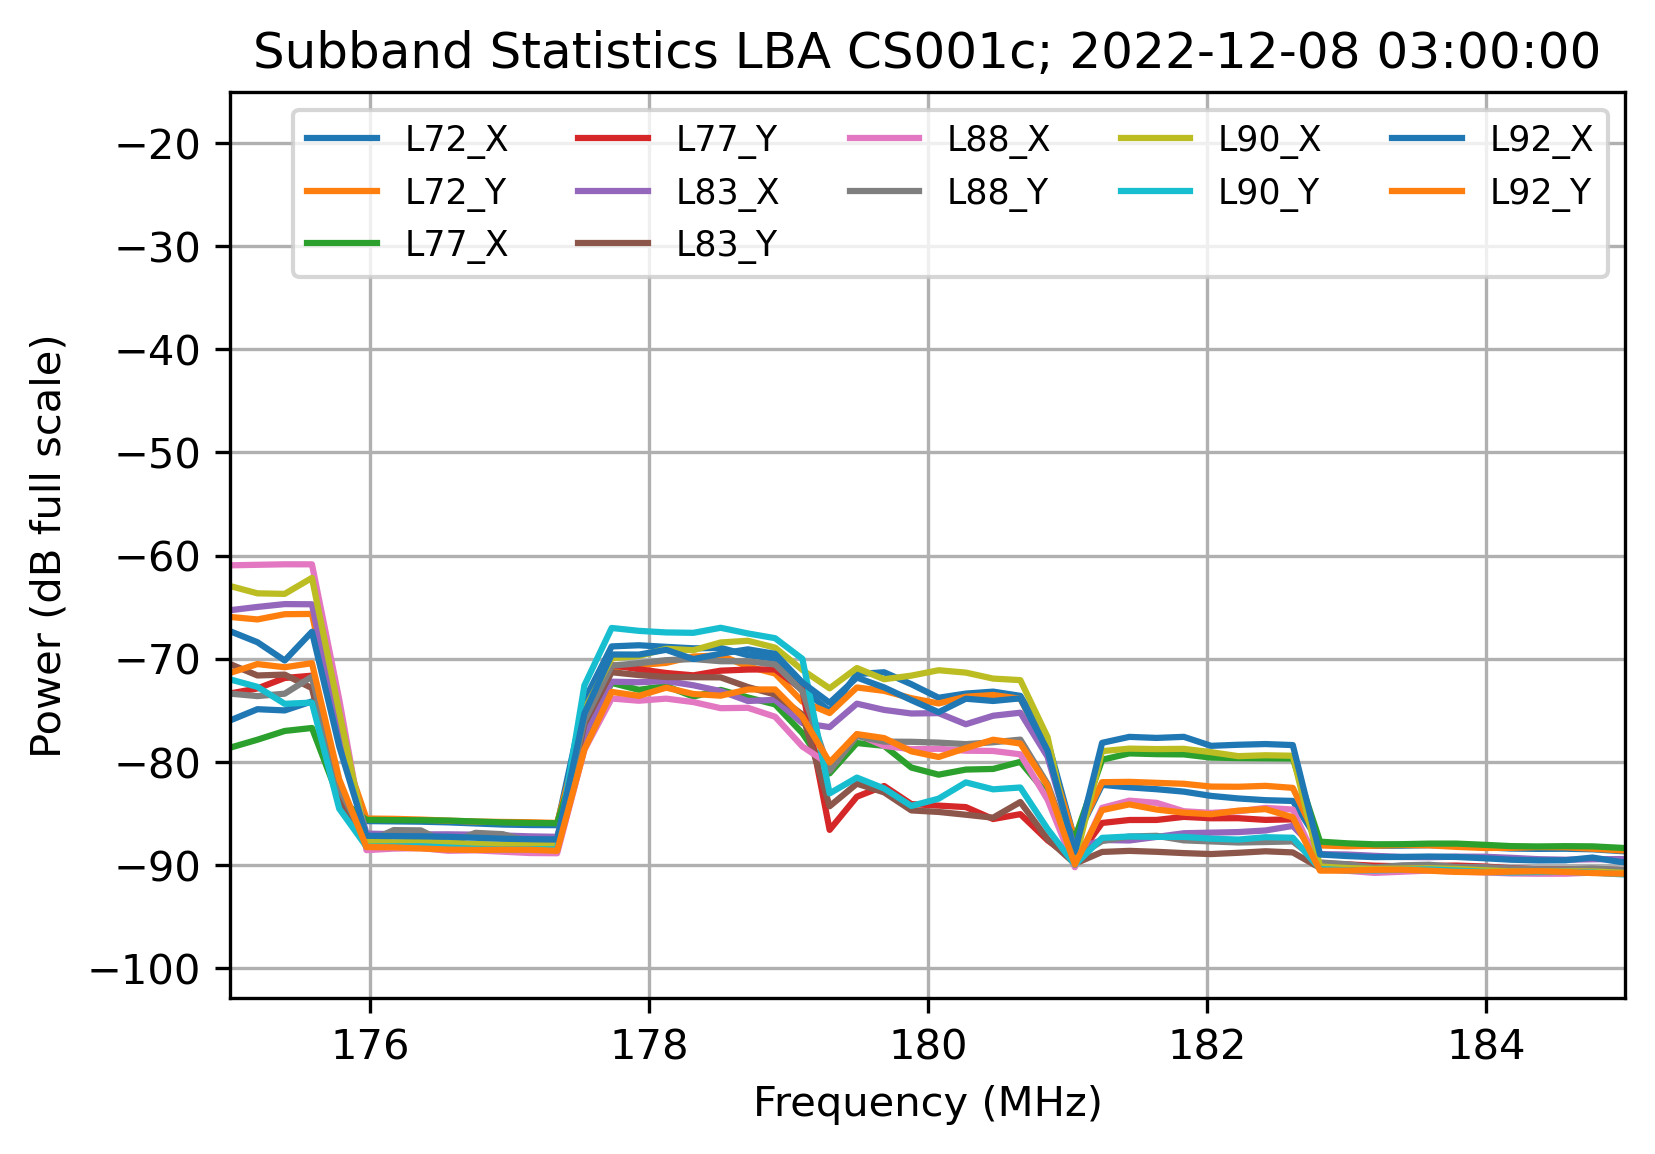

In [8]:
plt.figure(dpi=300)
for cnt in range(12):
    plot_data = 10 * np.log10(D[:,cnt,:]) - 128 - 6 * 4
    plot_data=np.percentile(plot_data,50,axis=0)
    plt_label = input_label[cnt]
    plt.plot(f_as, plot_data, label = plt_label)
plt.grid()
plt.xlim([175,185])
plt.legend(fontsize='small',ncol=5)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dB full scale)")
plt.title(f"Subband Statistics LBA {STATION_NAME}; {START_TIME}")
plt.show()


In [9]:
freqs=200-np.arange(512)/512*100
freq1=140;i1=np.argmin(np.abs(freqs-freq1))
#freq1=10.75;i1=np.argmin(np.abs(freqs-freq1))
#freq1=16.35;i1=np.argmin(np.abs(freqs-freq1))
freq2=170;i2=np.argmin(np.abs(freqs-freq2))
freq3=162;i3=np.argmin(np.abs(freqs-freq3))
#print(i2,i1,freqs[i1],freqs[i2])

307 1.1419296 3821 10.613888888888889


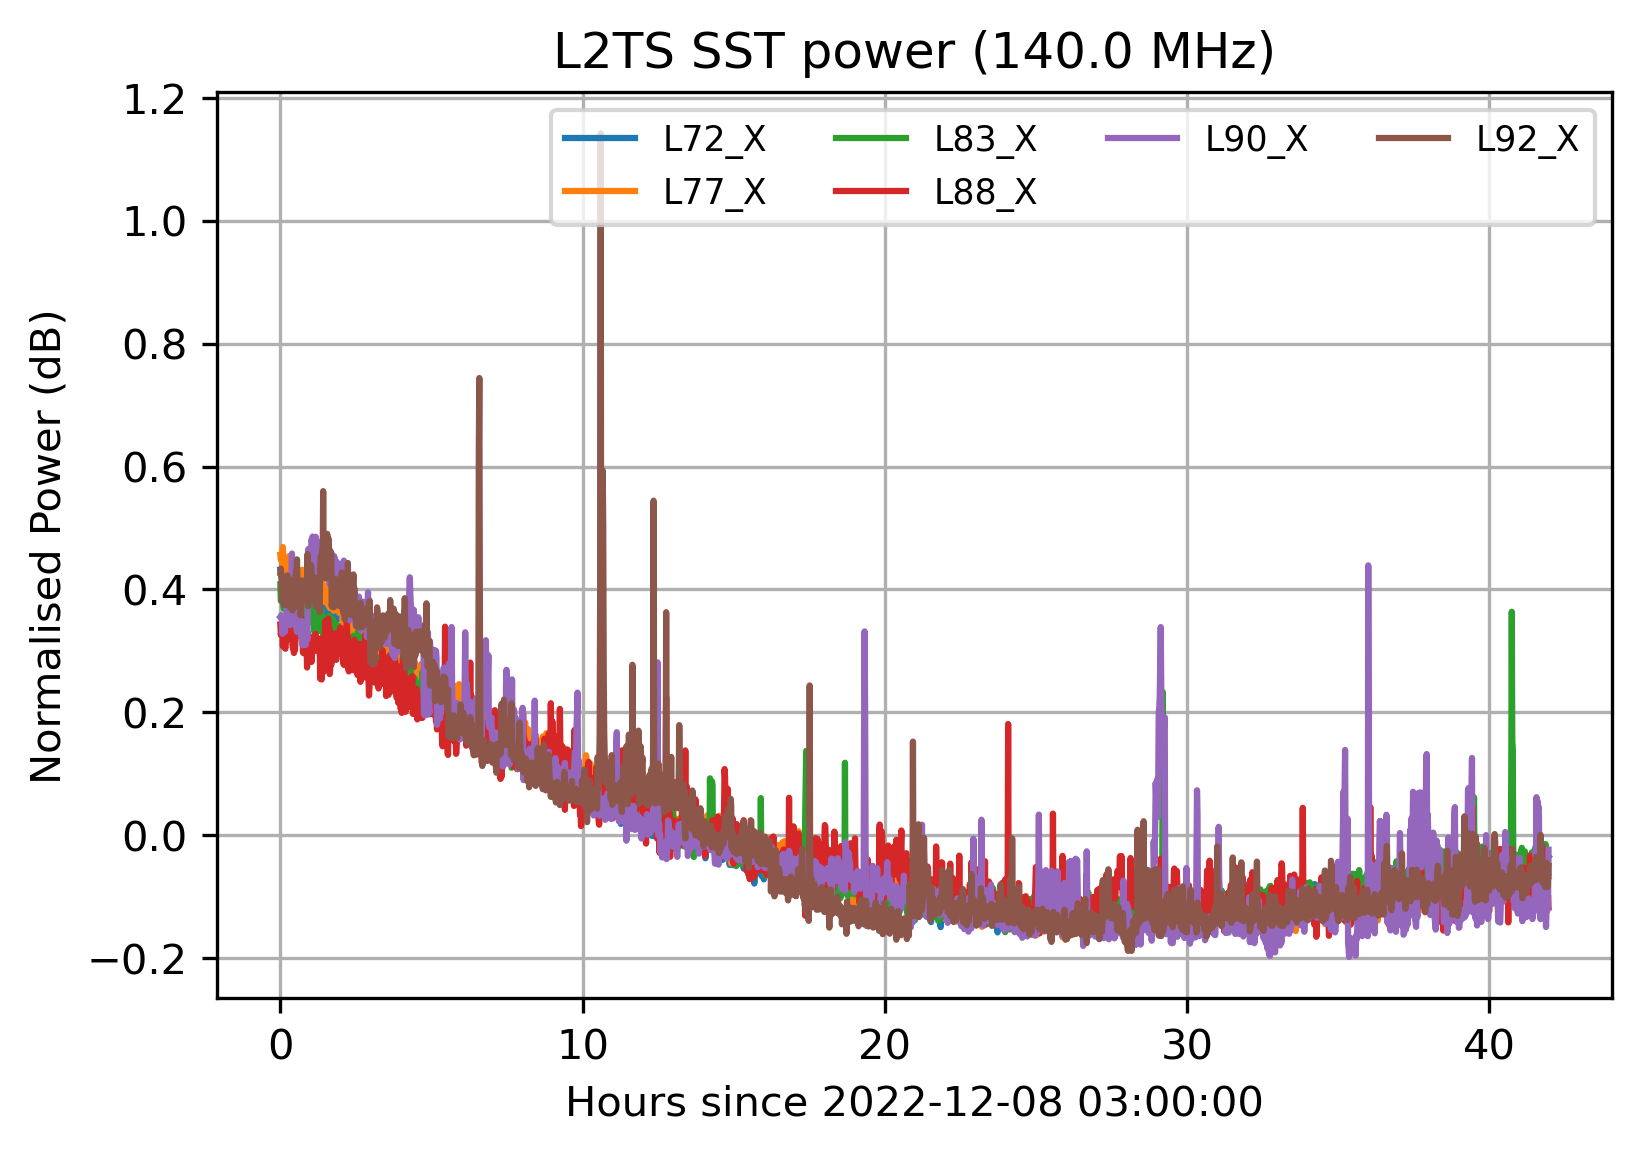

In [11]:
plt.figure(dpi=300)
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
hour_of_day=np.arange(D.shape[0])/60*tstep_min
for i in [i1]:
#for i in range(6):
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(D[:,::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    for l in range(6):
        plt.plot(hour_of_day,Pwr[:,l],label=input_label[l*2]);
    print(i,np.max(Pwr),np.argmax(Pwr),(np.argmax(Pwr))/360)
#plt.xlim(0,24)
#plt.ylim(-60,-40)
#plt.gca().set_prop_cycle(None)
#skyP=10*np.log10(sky[0,:])
#skyP=np.mean(skyP,axis=0)
#skyP-=np.mean(skyP)
#plt.plot(skyhour+1,skyP.T,'k:',linewidth=1,label='Tsky+Antenna Sim')
plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize='small',ncol=4)
plt.xlabel('Hours since ' + START_TIME)
plt.title("L2TS SST power (%.1f MHz)"%freqs[i])
plt.grid()
#plt.ylim(-2,-1)

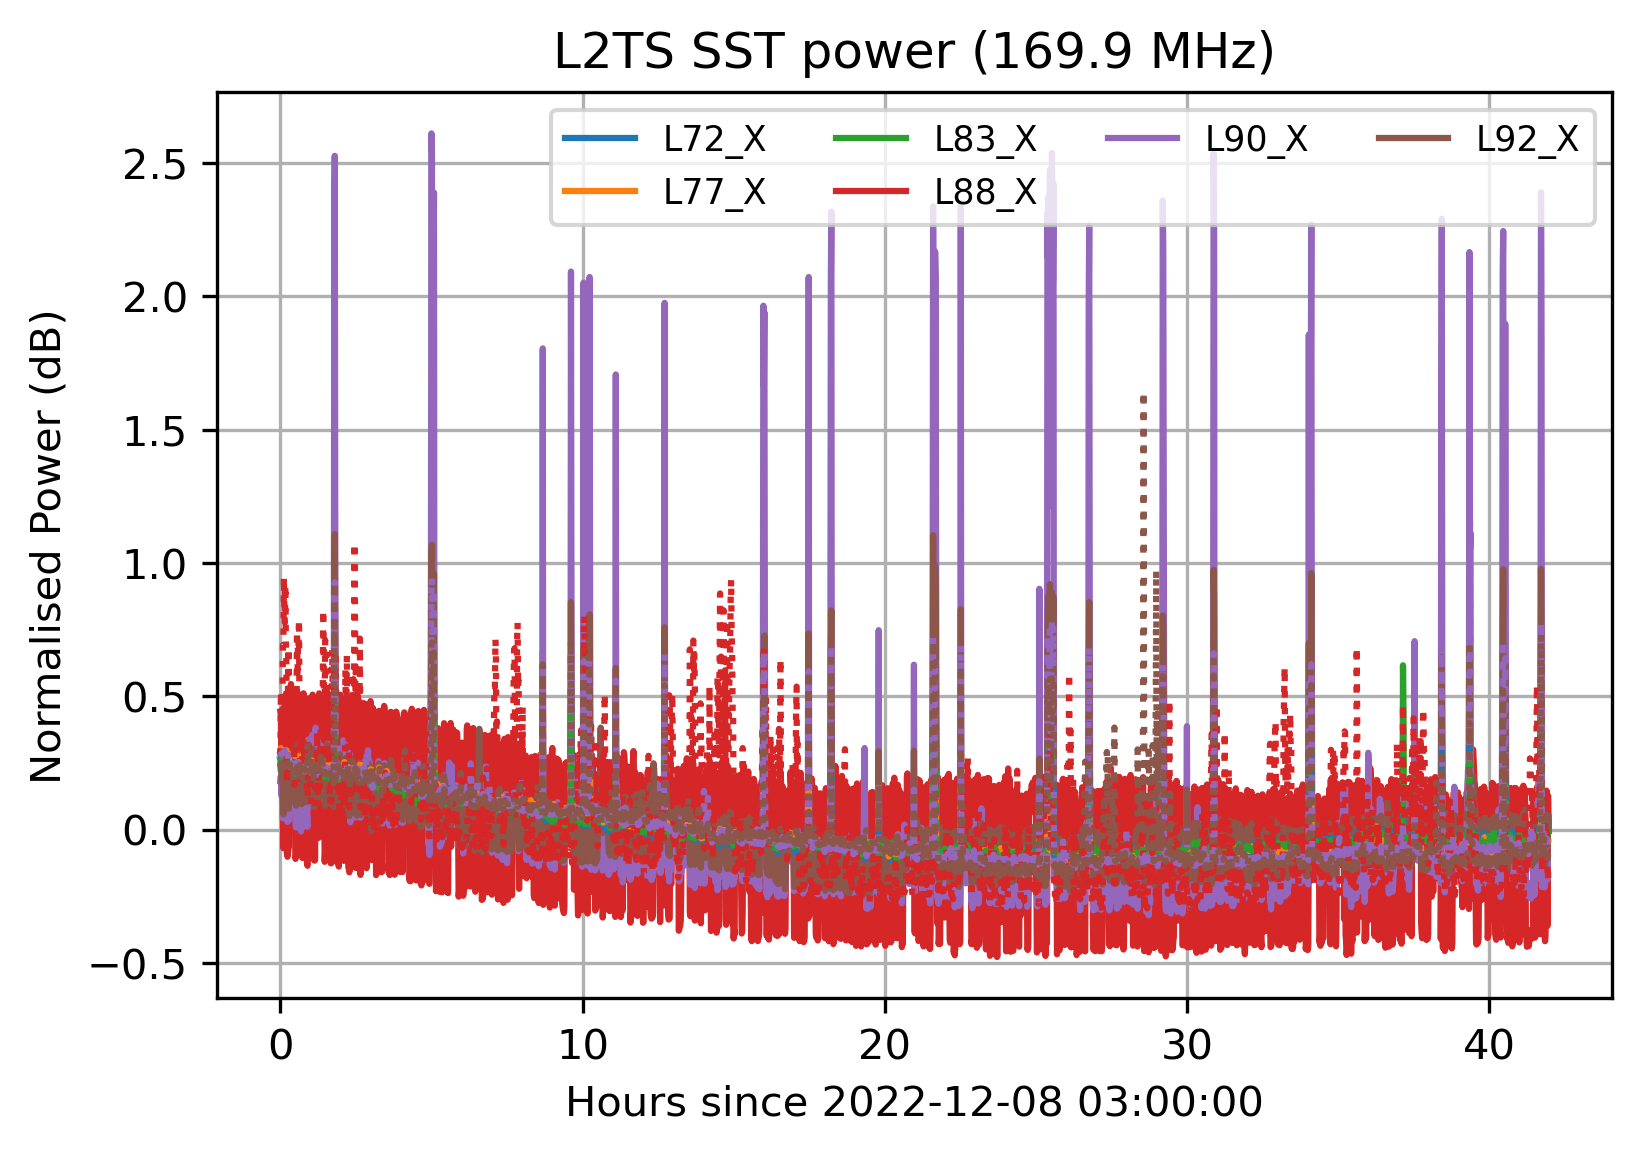

In [12]:
plt.figure(dpi=300)
for i in [i2]:
    Pwr=(10*np.log10(D[:,::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    for l in range(6):
        plt.plot(hour_of_day,Pwr[:,l],label=input_label[l*2]);
plt.gca().set_prop_cycle(None)
for i in [i2]:
    Pwr=(10*np.log10(D[:,1::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    for l in range(6):
        plt.plot(hour_of_day,Pwr[:,l],':');

plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize='small',ncol=4)
plt.xlabel('Hours since ' + START_TIME)
plt.title("L2TS SST power (%.1f MHz)"%freqs[i])
plt.grid()

[110, 120, 130, 140, 150, 160, 170, 177, 190]


(-1.0, 9.0)

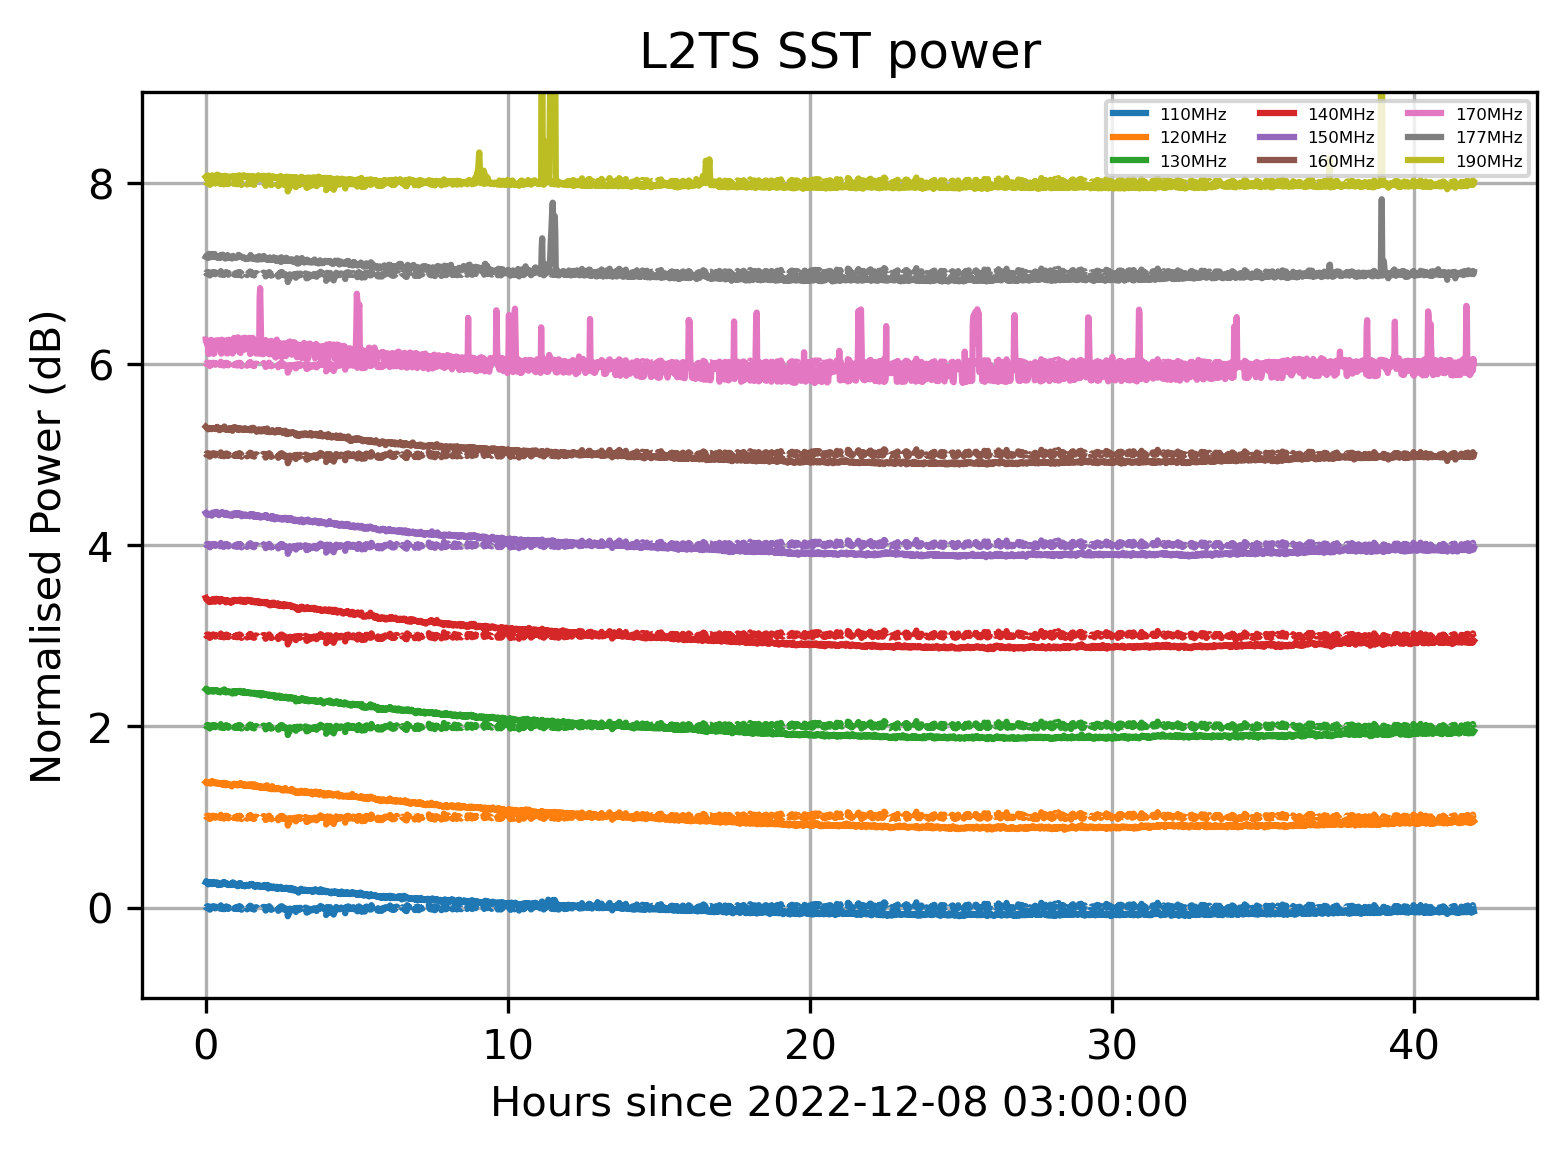

In [13]:
plt.figure(dpi=300)
freqlist=[x for x in range(110,191,10)]
freqlist[7]=177
print(freqlist)
for cnt,freq in enumerate(freqlist):
#for i in range(6):
    i=np.argmin(np.abs(freqs-freq))
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(D[:,::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    Pwr=np.percentile(Pwr,50,axis=1)
    plt.plot(hour_of_day,Pwr+cnt,label='%iMHz'%freq);
#    print(i,np.max(Pwr),istart+np.argmax(Pwr),(istart+np.argmax(Pwr))/360)
plt.gca().set_prop_cycle(None)
for cnt,freq in enumerate(range(40,85,5)):
#for i in range(6):
    i=np.argmin(np.abs(freqs-freq))
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(D[:,1::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    Pwr=np.percentile(Pwr,50,axis=1)
    plt.plot(hour_of_day[:],Pwr+cnt,'--');


#skyhour=np.arange(25*60/15)/4
#for cnt,freq in enumerate(range(40,85,5)):
#    sky=np.load("../L2TS_cal/Sky2022-11-04-15-00-00_%iMHz.npy"%freq)
#    skyP=10*np.log10(sky[0,:])
#    skyP-=np.mean(skyP)
#    plt.plot(skyhour,skyP.T+cnt,'k:',linewidth=1)
#
#    skyP=10*np.log10(sky[1,:])
#    skyP-=np.mean(skyP)
#    plt.plot(skyhour-1,skyP.T+cnt,'k:',linewidth=1)
plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize=4,ncol=3)
plt.xlabel('Hours since ' + START_TIME)
plt.title("L2TS SST power")
plt.grid()
#plt.xlim(0,23)
plt.ylim(-1,9)

Text(0.5, 1.0, ' Spectrogam of HBA input nr L88_X')

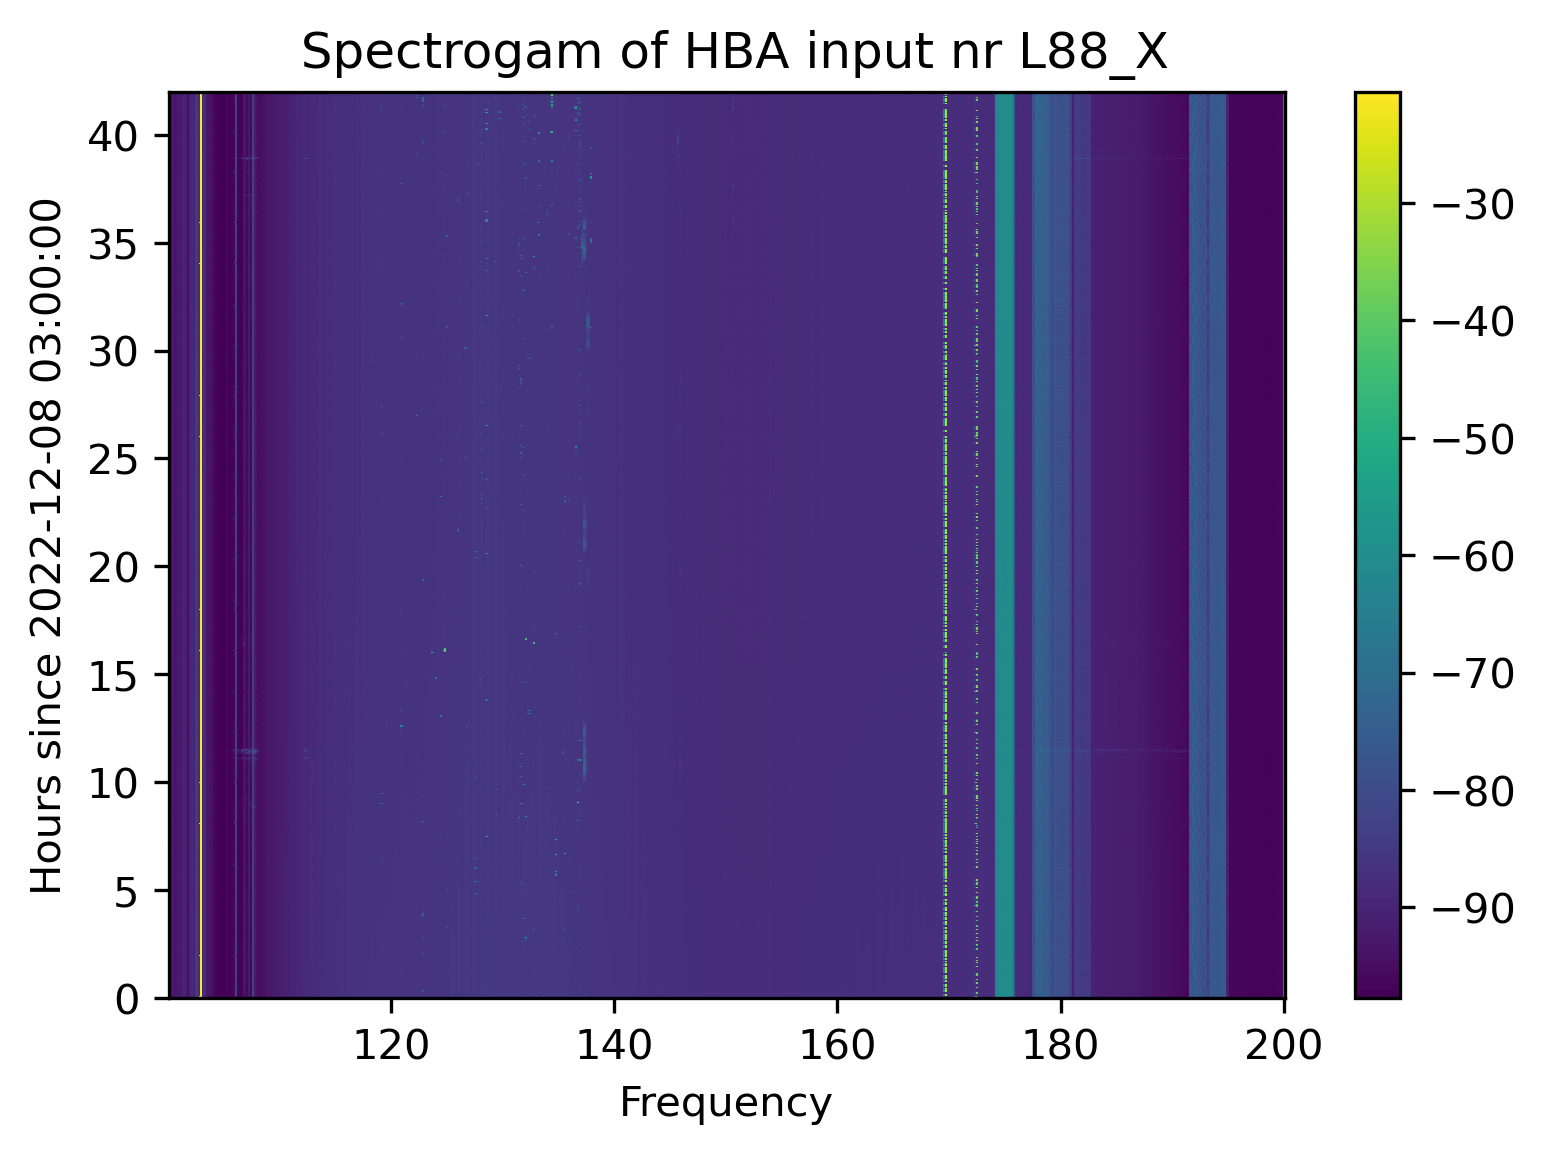

In [14]:
lba_si_nr = 6
plt.figure(dpi=300)
#plt.imshow(10*np.log10(D[:,1,:])-GainADC,vmin=-80,vmax=-60)
yas = hour_of_day #range(len(D[:,1,1]))
plt.pcolor(freqs, yas, 10*np.log10(D[:,lba_si_nr,:])-GainADC) #,vmin=-80,vmax=-60)
plt.colorbar()
plt.xlabel('Frequency')
plt.ylabel('Hours since ' + START_TIME)
plt.title(f" Spectrogam of HBA input nr {input_label[lba_si_nr]}")
#plt.savefig("./results/sst_lba_waterval.png")

Text(0.5, 1.0, ' Spectrogam of LBA input nr L88_Y')

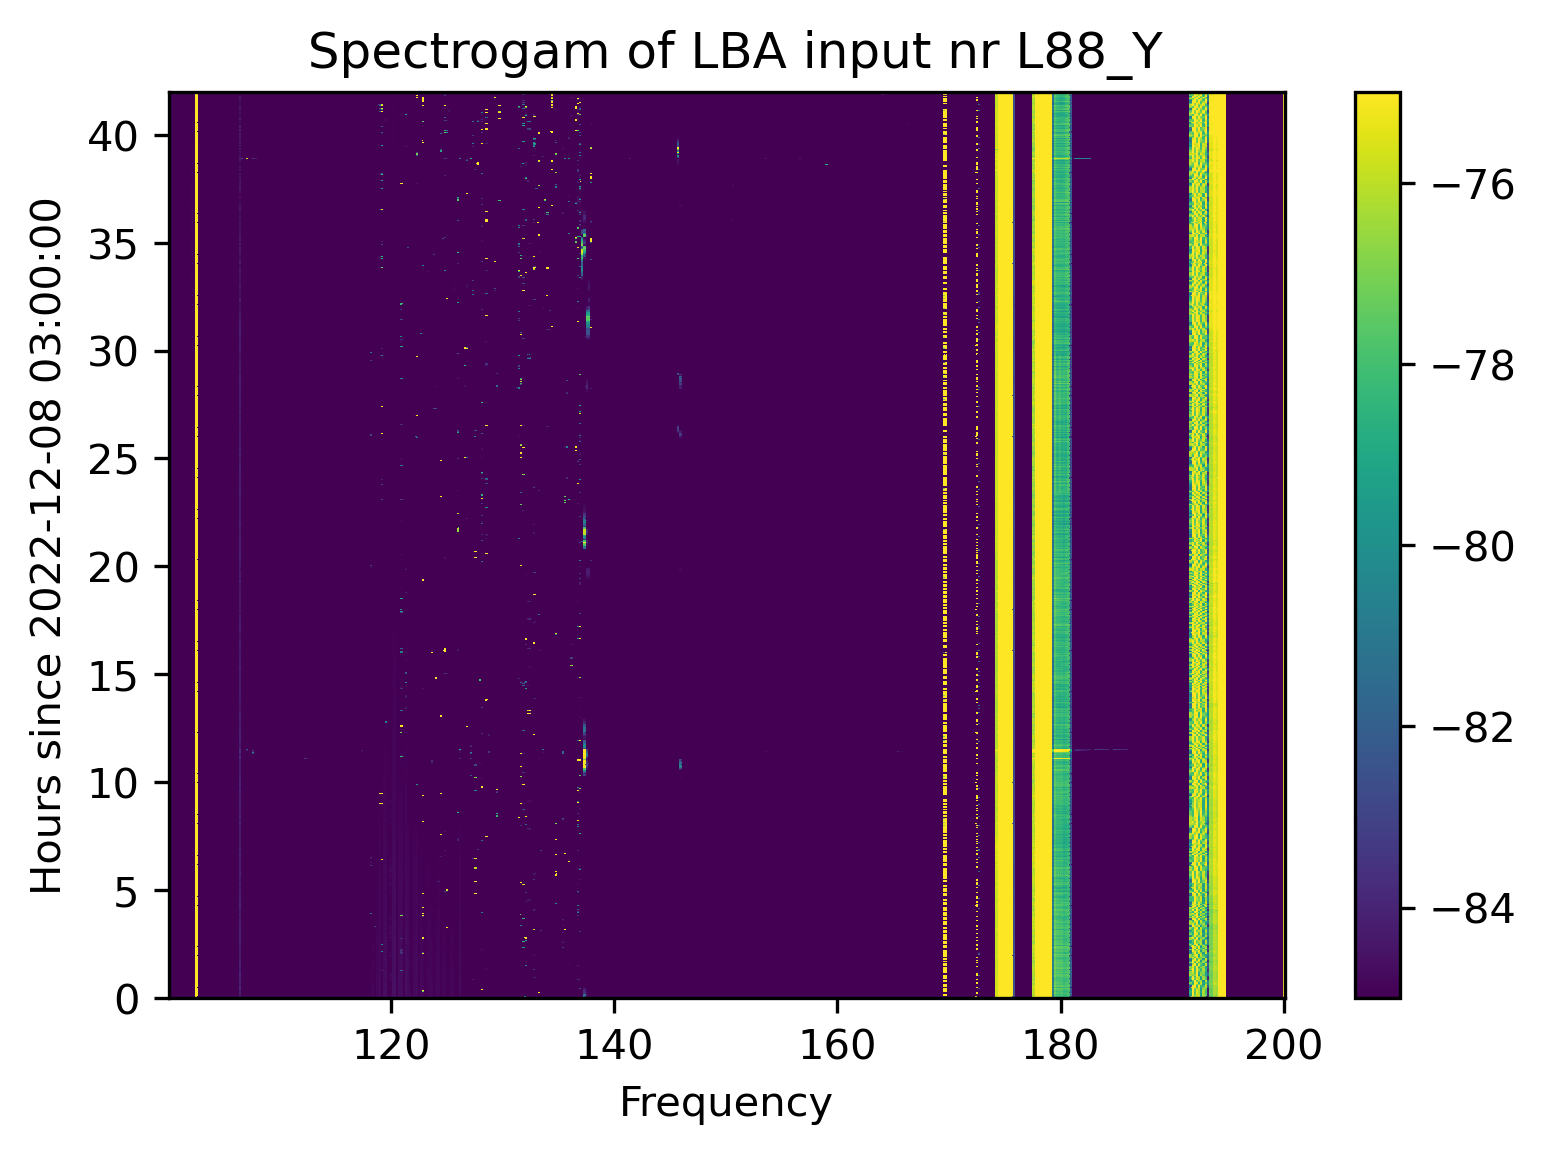

In [15]:
lba_si_nr = 7
plt.figure(dpi=300)
#plt.imshow(10*np.log10(D[:,1,:])-GainADC,vmin=-80,vmax=-60)
yas = hour_of_day #range(len(D[:,1,1]))
plt.pcolor(freqs, yas, 10*np.log10(D[:,lba_si_nr,:])-GainADC) #,vmin=-80,vmax=-60)
plt.colorbar()
plt.xlabel('Frequency')
plt.ylabel('Hours since ' + START_TIME)
plt.clim([-85, -75])
plt.title(f" Spectrogam of LBA input nr {input_label[lba_si_nr]}")
#plt.savefig("./results/sst_lba_waterval.png")
#plt.xlim(16,18)

In [10]:
L1_rcus1=range(0,48,3)
L1_files1='../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853'

if True:
 from sst_bst import LoadL1sst
 D=[]
 for rcu in L1_rcus1:
    D1=LoadL1sst(L1_files1,rcu)
    #print(D1.shape)
    L1_hour=np.arange(D1.shape[0])/60/60+(15+58/60+59/60/60-24)
    mask=(L1_hour>0)*(L1_hour<3)
    D1=D1.compress(mask,axis=0)
    #print(D1.shape)
    D.append(D1)
 D=np.array(D)
 D=np.swapaxes(D,0,1)
 print(D.shape)
 np.save("L1_HBA_RFI",D)
else:
 D=np.load("L1_HBA_RFI.npy")


../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu000.dat
(46800, 512)
(10799, 512)
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu003.dat
(46800, 512)
(10799, 512)
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu006.dat
(46800, 512)
(10799, 512)
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu009.dat
(46800, 512)
(10799, 512)
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu012.dat
(46800, 512)
(10799, 512)
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu015.dat
(46800, 512)
(10799, 512)
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu018.dat
(46800, 512)
(10799, 512)
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu021.dat
(46800, 512)
(10799, 512)
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu024.dat
(46800, 512)
(10799, 512)
../menno/cs032/20221207155823_SST_HBA_ZERO/20221207_155853_sst_rcu027.dat
(46800, 512)
(10799, 512)


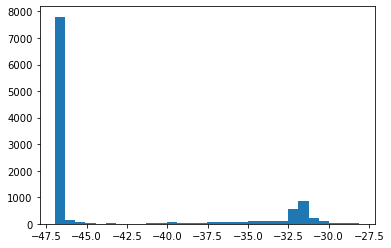

In [11]:
Pwr=np.sum(D[:,:,5:-5].mean(axis=1),axis=1)
Pwr=P2dB(Pwr)-GainADC
plt.hist(Pwr,bins=30);
Pcut=-43;

In [26]:
mask=Pwr>-34
mask2=Pwr<Pcut
Da=D.compress(mask2,axis=0)
Db=D.compress(mask,axis=0)
print(D.shape,D0.shape)
D2a=np.percentile(Db,50,axis=0)
D1a=np.percentile(Da,50,axis=0)
print(D2a.shape,D1a.shape)

(10799, 16, 512) (8282, 12, 512)
(16, 512) (16, 512)


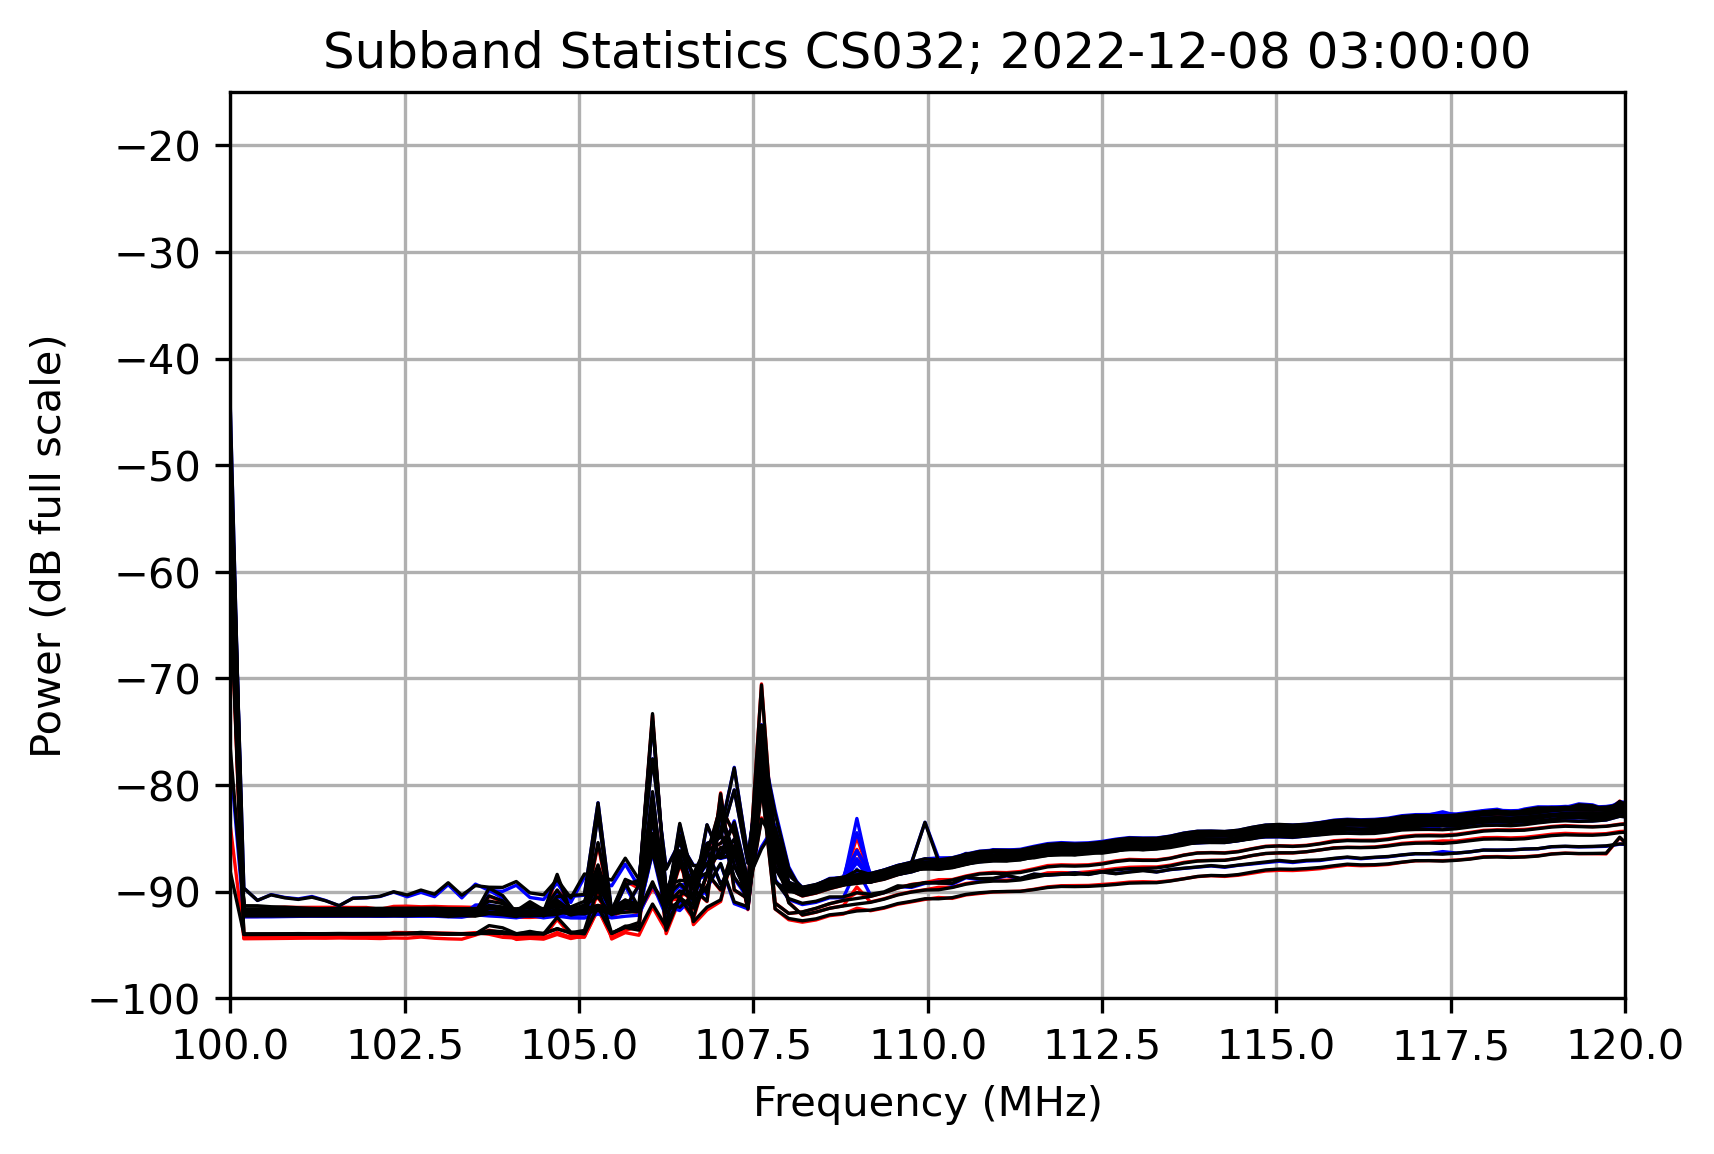

In [33]:
plt.figure(dpi=300)
FS=200
FFT_POINTS=512
STATION_NAME = 'CS032'
f_as2 = [100+(FS*cnt)/(2*FFT_POINTS) for cnt in range(FFT_POINTS)]
for cnt, f_si in enumerate(D2a[:,:]):
    plot_data = 10 * np.log10(f_si + 1) - 128 - 6 * 4
    plt_label = input_label[cnt]
    scale=-2 if cnt<3 else 0
    plt.plot(f_as2, plot_data+scale, 'r-' if cnt<6 else 'b-',linewidth=0.8)
for cnt, f_si in enumerate(D1a[:,:]):
    plot_data = 10 * np.log10(f_si + 1) - 128 - 6 * 4
    plt_label = input_label[cnt]
    scale=-2 if cnt<3 else 0
    plt.plot(f_as2, plot_data+scale, 'k-',linewidth=0.8)

    
plt.grid()
plt.xlim([100,200])
plt.xlim([100,120])
#plt.ylim(-89+1,-84+1)
plt.ylim(-100,-15)
#plt.legend(fontsize='small',ncol=5)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dB full scale)")
plt.title(f"Subband Statistics {STATION_NAME}; {START_TIME}")
plt.show()

    

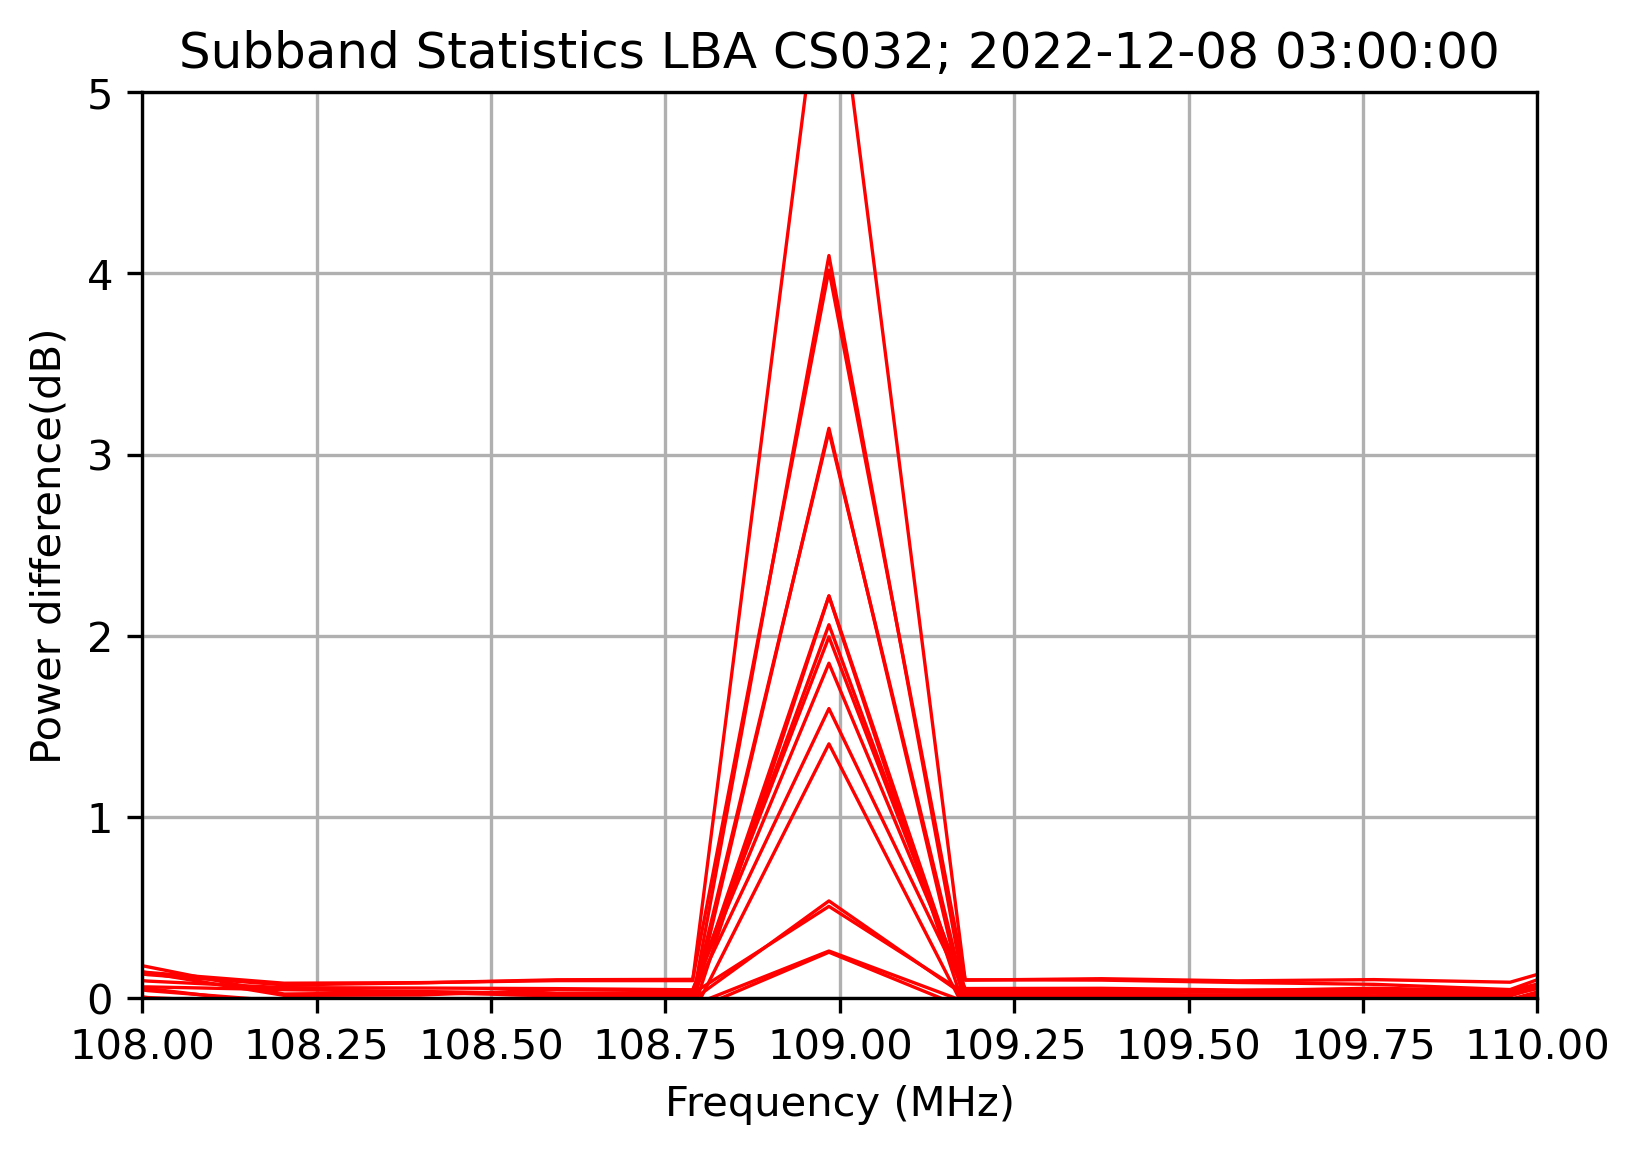

In [34]:
plt.figure(dpi=300)
for cnt, f_si in enumerate(D2a[:,:]):
    plot_data = 10 * np.log10(D2a[cnt,:]/D1a[cnt,:])
    plt_label = input_label[cnt]
    plt.plot(f_as2, plot_data, 'r-',linewidth=0.8)

    
plt.grid()
plt.xlim([108,110])
#plt.xlim([160,180])
#plt.ylim(-89+1,-84+1)
#plt.ylim(-0.02,0.08)
plt.ylim(-0.0,5.0)
#plt.legend(fontsize='small',ncol=5)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power difference(dB)")
plt.title(f"Subband Statistics LBA {STATION_NAME}; {START_TIME}")
plt.show()

    

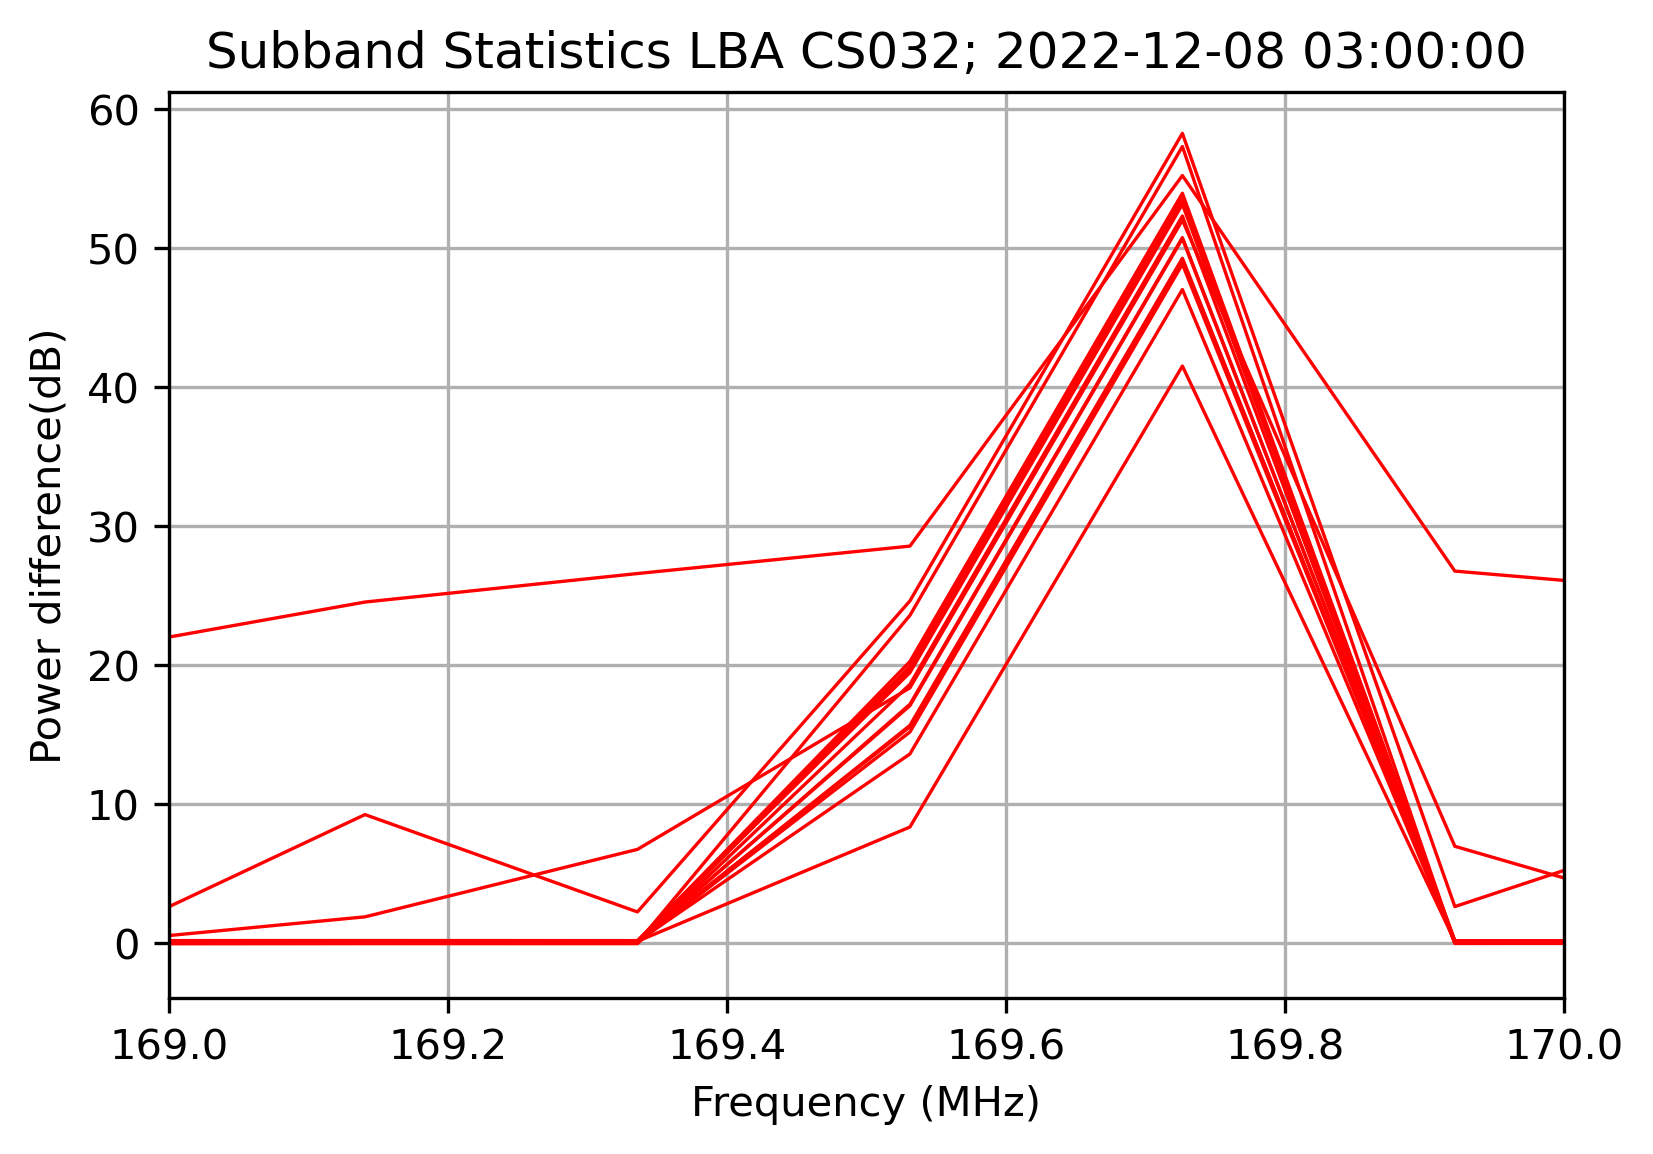

In [35]:
plt.figure(dpi=300)
for cnt, f_si in enumerate(D2a[:,:]):
    plot_data = 10 * np.log10(D2a[cnt,:]/D1a[cnt,:])
    plt_label = input_label[cnt]
    plt.plot(f_as2, plot_data, 'r-',linewidth=0.8)
    
plt.grid()
plt.xlim([169,170])
#plt.xlim([160,180])
#plt.ylim(-89+1,-84+1)
#plt.ylim(-0.02,0.08)
#plt.ylim(-0.0,5.0)
#plt.legend(fontsize='small',ncol=5)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power difference(dB)")
plt.title(f"Subband Statistics LBA {STATION_NAME}; {START_TIME}")
plt.show()

    

/tmp/ipykernel_1466951/628862603.py:3: RuntimeWarning: invalid value encountered in log10
  def P2dB(P): return 10*np.log10(P)


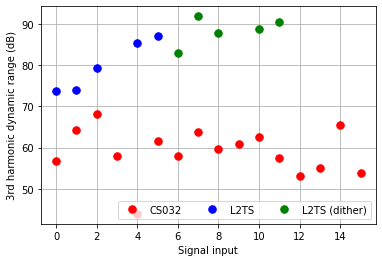

In [63]:
f_as2=np.array(f_as2)
ipgr=np.argmin(np.abs(f_as2-169.7));
ip3=np.argmin(np.abs(f_as2-108.9))
Dp3a=P2dB(D2a[:,ip3]-D1a[:,ip3])
Dpgra=P2dB(D2a[:,ipgr]-D1a[:,ipgr])
plt.plot(Dpgra-Dp3a,'r.',label='CS032',markersize=15)
#plt.plot(,'r--')

f_as=np.array(f_as)
ipgr=np.argmin(np.abs(f_as-169.7));
ip3=np.argmin(np.abs(f_as-108.9))
Dp3=P2dB(D2[:,ip3]-D1[:,ip3])
Dpgr=P2dB(D2[:,ipgr]-D1[:,ipgr])
plt.plot(range(6),(Dpgr-Dp3)[:6],'b.',label='L2TS',markersize=15)
plt.plot(range(6,12),(Dpgr-Dp3)[6:12],'g.',label='L2TS (dither)',markersize=15)
#plt.plot(-90,'b--')
plt.ylabel("3rd harmonic dynamic range (dB)")
plt.xlabel("Signal input")
plt.legend(loc='lower right',fontsize=10,ncol=3)
plt.grid()